In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm,tree
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error

In [4]:
X=pd.read_csv('dengue_features_train.csv')
Y=pd.read_csv('dengue_labels_train.csv')

In [5]:
X

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [6]:
Y

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


Assume that the both data are sorted (i would not join using  x.city=y.city and x.year=y.year and x.weekofyear=y.weekofyear )

In [7]:
X['total_cases']=Y['total_cases'].astype(int)

In [8]:
X

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


#### Step 1- Checking for the null in the dataset<br>
#### Step 2- Fill Null values if found<br>
#### Step 3- Understand the distribution of the data<br>
#### Step 4- Convert Categorical columns to numbers
#### Step 5- Apply Feature selection OR Feature Reduction
#### Step 6- Apply ML
#### Step 7- Apply model for test set

# Step 1: Check Nulls

In [10]:
X.isnull().any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_t

In [12]:
X.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

# Step 2: Fill Null

In [310]:
# if i droped the nulls, the total count of the dataset will be = 1199
# for now, i will drop the nulls, but after while, i will fill the nulls for each column using liner reggrsssion or KNN, or to be easy
# I might fill with the mean (I should checking for outliers first)

print(X.isna().sum())
X.dropna(inplace=True)
print(X.info())

city                                     0
year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases

Fill the missing data with the mean

In [269]:
# Columns with missing data
cols_with_missing = [col for col in X.columns
                     if X[col].isnull().any()]
X[cols_with_missing].fillna(X[cols_with_missing].median(), inplace=True)

C:\Users\Mohanad\AppData\Local\Temp\ipykernel_28892\2792772028.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols_with_missing].fillna(X[cols_with_missing].median(), inplace=True)


# Step 3: Understand the distribution of the data

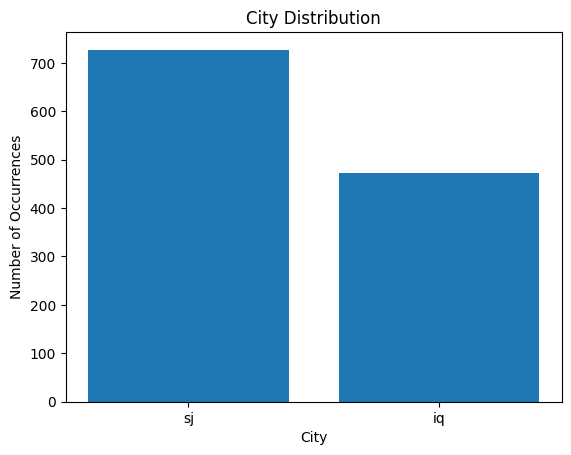

In [270]:
city_counts = X['city'].value_counts()

plt.bar(city_counts.index, city_counts.values)
plt.xlabel('City')
plt.ylabel('Number of Occurrences')
plt.title('City Distribution')
plt.show()

In [271]:
def getMonth(row):
    date=row['week_start_date']
    month = int(date.split('-')[1] )
    return month

months = X.apply(getMonth,axis=1)
test_cases = X['total_cases']

In [272]:
time_month = np.zeros(13)
for i in range(len(months)):
    time_month[months.iloc[i]]+=test_cases.iloc[i]

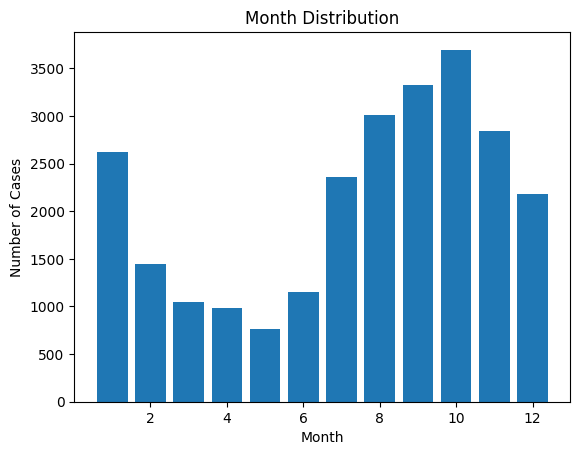

In [273]:
plt.bar(range(1,13),time_month[1:])
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Month Distribution')
plt.show()

I observe that the disease increases in the summer

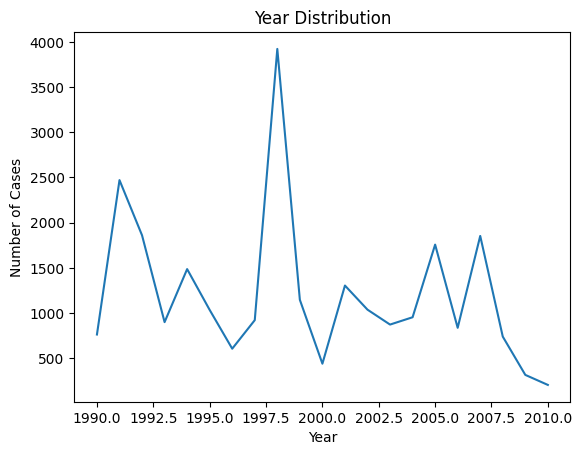

In [274]:
time_year = np.zeros(21)
for i in range(len(X)):
    time_year[X['year'].iloc[i]-1990]+=test_cases.iloc[i].astype(int)

plt.plot(range(1990,2011),time_year)
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Year Distribution')
plt.show()


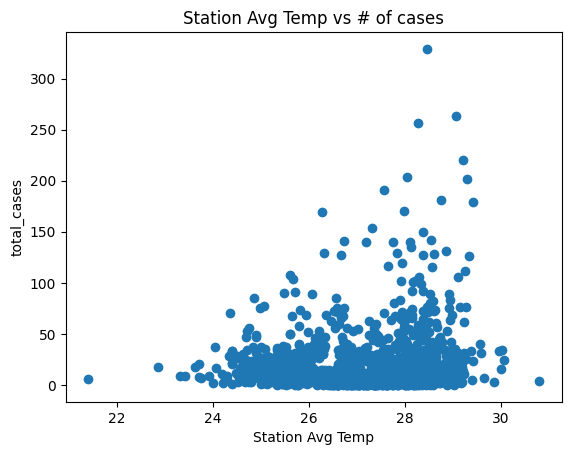

In [275]:
# plot station_avg_temp_c against total_cases
plt.scatter(X['station_avg_temp_c'], X['total_cases'])
plt.xlabel('Station Avg Temp')
plt.ylabel('total_cases')
plt.title('Station Avg Temp vs # of cases')
plt.show()


No direct relation between station average temperature and the number of cases

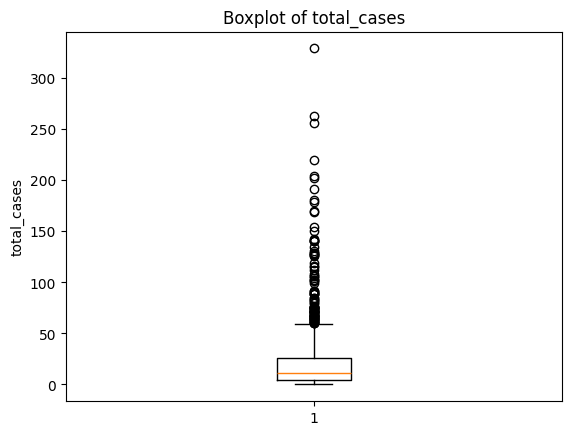

In [276]:
plt.boxplot(X['total_cases'])
plt.ylabel('total_cases')
plt.title('Boxplot of total_cases')
plt.show()

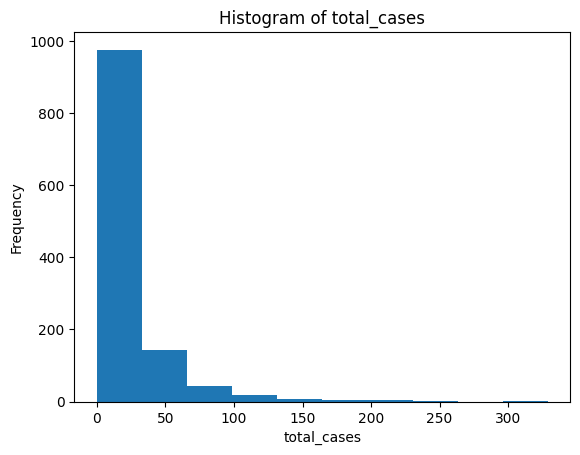

In [277]:
# draw histogram of total_cases
plt.hist(X['total_cases'])
plt.xlabel('total_cases')
plt.ylabel('Frequency')
plt.title('Histogram of total_cases')
plt.show()

As we can see from the Box Plot diagram and the histogram of the Total Cases, number above ~75 are outliers, So, i am going to remove them

# Step 4: Convert categorical data and Normalize the data

In [278]:
# convert city to 0 and 1
X['city']=X['city'].map({'sj':0,'iq':1})

In [279]:
# Drop week_start_date column, i think it is not important
X=X.drop('week_start_date',axis=1)

In [280]:
X.columns

Index(['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [281]:
# # Normalize all the columns except the city column and the total_cases column
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# Normalize all columns
for col in X.columns:
    if col not in ['city','total_cases','year','weekofyear']:
        scaler = RobustScaler()
        X[col]=scaler.fit_transform(X[col].values.reshape(-1,1))

In [282]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1199 non-null   int64  
 1   year                                   1199 non-null   int64  
 2   weekofyear                             1199 non-null   int64  
 3   ndvi_ne                                1199 non-null   float64
 4   ndvi_nw                                1199 non-null   float64
 5   ndvi_se                                1199 non-null   float64
 6   ndvi_sw                                1199 non-null   float64
 7   precipitation_amt_mm                   1199 non-null   float64
 8   reanalysis_air_temp_k                  1199 non-null   float64
 9   reanalysis_avg_temp_k                  1199 non-null   float64
 10  reanalysis_dew_point_temp_k            1199 non-null   float64
 11  reanalysi

In [283]:
from sklearn.decomposition import PCA

In [284]:
X_train, X_val, Y_train, Y_val = train_test_split(X.iloc[:,:-1], X.iloc[:,-1], test_size = 0.2)
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((959, 23), (240, 23), (959,), (240,))

In [285]:
pca = PCA(n_components=5)

# Fit the PCA model and transform the features
features_pca = pca.fit_transform(X_train)
X_val = pca.transform(X_val)

# Create a DataFrame with the reduced features
columns_pca = [f'PCA_{i+1}' for i in range(5)]
df_pca = pd.DataFrame(features_pca, columns=columns_pca)
X_val = pd.DataFrame(X_val, columns=columns_pca)

X_train = df_pca.copy()

In [286]:
X_train

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,1.648292,0.352423,-0.052929,-1.442179,0.737391
1,24.580682,-2.331746,-2.502408,1.504000,0.141937
2,-0.449013,-0.273781,2.243733,1.008566,-1.392076
3,-22.374850,-4.647548,-1.437785,-0.231723,-0.514388
4,7.561179,0.254485,-1.956166,0.184856,0.771096
...,...,...,...,...,...
954,20.688261,0.380831,2.290478,-0.834989,1.022664
955,-12.386888,-3.667617,2.333539,1.899340,-0.890470
956,-17.251347,-6.006064,0.744387,2.223385,3.396137
957,24.565838,-3.668507,-4.393956,1.783352,0.680817


In [287]:
X_val

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,14.356806,9.964621,0.198797,-0.982966,-0.195939
1,17.763875,-1.742070,2.348372,-1.360468,1.280046
2,-2.397765,-1.451129,1.811207,1.118964,0.068415
3,5.552589,1.792066,1.211848,0.021197,-0.211203
4,-20.317871,-5.655197,-1.940898,-0.113273,1.537075
...,...,...,...,...,...
235,-23.259350,-7.566074,-0.619818,-0.802661,-0.599252
236,-8.270545,-7.273932,-1.348176,-1.406339,-1.113830
237,-18.540236,0.488157,-1.260766,-1.235546,-2.136684
238,-16.366657,-3.862662,1.742940,1.792235,-0.035329


# Step 6: Apply ML

In [288]:
batch_size = 3

In [289]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras

# Creating a sequential model
model = Sequential()
model.add(Dense(X_train.shape[1], activation='swish'))
model.add(Dense(8, activation='swish'))
model.add(Dropout(0.5))


model.add(Dense(8, activation='swish'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='relu'))
# Compiling the model
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adamax(learning_rate=0.001), metrics=['mae'])
model.build(
    input_shape = (batch_size,X_train.shape[1]))
model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_138 (Dense)           (3, 5)                    30        
                                                                 
 dense_139 (Dense)           (3, 8)                    48        
                                                                 
 dropout_38 (Dropout)        (3, 8)                    0         
                                                                 
 dense_140 (Dense)           (3, 8)                    72        
                                                                 
 dropout_39 (Dropout)        (3, 8)                    0         
                                                                 
 dense_141 (Dense)           (3, 1)                    9         
                                                                 
Total params: 159 (636.00 Byte)
Trainable params: 159

In [290]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_mae', patience=5, verbose=1)


In [291]:
Y_train.unique()

array([  1,   5,   2,  11,   0,  89, 140,  16,   7,  14,   4,  22,  31,
        13,   6,   8, 115,  21,  19, 129,  10,  12,  32,  23,  24,   9,
        71,  17,  18,   3,  34,  15,  67,  26,  43,  72,  38,  20, 102,
        60,  42,  44,  28,  25,  36,  40,  29,  56,  35,  76,  66,  62,
        59,  37,  30,  27, 202,  55,  68, 116,  47,  41,  54,  46,  53,
       150,  33,  70, 135,  64,  83,  61,  49,  80,  74,  65,  50, 127,
        45,  75, 108,  99, 131, 204, 256, 106,  51, 101, 104, 329, 112,
        82,  52, 191, 170,  73,  85, 119, 169,  57,  92,  58,  63, 181,
       141,  77,  90, 220,  48,  39, 263, 128])

In [292]:
# Training the model
model.fit(X_train, Y_train,validation_data=(X_val, Y_val), epochs=300, batch_size=batch_size,callbacks=[early_stopping])


Epoch 1/300
320/320 [==============================] - 2s 3ms/step - loss: 1439.0023 - mae: 20.8627 - val_loss: 1180.6324 - val_mae: 21.2897
Epoch 2/300
320/320 [==============================] - 1s 3ms/step - loss: 1432.9315 - mae: 20.7359 - val_loss: 1172.3481 - val_mae: 21.1262
Epoch 3/300
320/320 [==============================] - 1s 3ms/step - loss: 1423.8607 - mae: 20.5429 - val_loss: 1163.6007 - val_mae: 20.9464
Epoch 4/300
320/320 [==============================] - 1s 3ms/step - loss: 1415.2715 - mae: 20.4031 - val_loss: 1153.9279 - val_mae: 20.7451
Epoch 5/300
320/320 [==============================] - 1s 3ms/step - loss: 1408.7198 - mae: 20.2384 - val_loss: 1144.0939 - val_mae: 20.5399
Epoch 6/300
320/320 [==============================] - 1s 3ms/step - loss: 1399.6329 - mae: 20.0314 - val_loss: 1135.6803 - val_mae: 20.3650
Epoch 7/300
320/320 [==============================] - 1s 3ms/step - loss: 1394.5059 - mae: 19.9663 - val_loss: 1127.1346 - val_mae: 20.1915
Epoch 8/300
3

In [1]:
#models
#2 multilinear 
#3 SCM, RPF --> with grid search
#4 single linear
#5 multipoly regression 
#6 LDA 

In [302]:
LR_model = LinearRegression()
 
LR_model.fit(X_train, Y_train)
y_pred = LR_model.predict(X_val)
mae = mean_absolute_error(y_true=Y_val,y_pred=y_pred)
print("MAE: ",mae)

MAE:  15.290187687121598


In [303]:
SVM_model = svm.SVR()
SVM_model.fit(X_train, Y_train)
y_pred = SVM_model.predict(X_val)
mae = mean_absolute_error(y_true=Y_val,y_pred=y_pred)
print("MAE: ",mae)


MAE:  12.74371039422288


In [304]:
DT_model = tree.DecisionTreeRegressor(max_depth=500,max_leaf_nodes=1000)
DT_model.fit(X_train, Y_train)
y_pred = DT_model.predict(X_val)
mae = mean_absolute_error(y_true=Y_val,y_pred=y_pred)
print("MAE: ",mae)

MAE:  10.666666666666666


In [305]:
RF_model = RandomForestClassifier(n_estimators=100,max_depth=500,max_leaf_nodes=1000)
RF_model.fit(X_train, Y_train)
y_pred = RF_model.predict(X_val)
mae = mean_absolute_error(y_true=Y_val,y_pred=y_pred)
print("MAE: ",mae)

MAE:  10.741666666666667


In [306]:
NB_model = GaussianNB()
NB_model.fit(X_train, Y_train)
y_pred = NB_model.predict(X_val)
mae = mean_absolute_error(y_true=Y_val,y_pred=y_pred)
print("MAE: ",mae)

MAE:  16.016666666666666


In [307]:
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train, Y_train)
y_pred = KNN_model.predict(X_val)
mae = mean_absolute_error(y_true=Y_val,y_pred=y_pred)
print("MAE: ",mae)

MAE:  14.008333333333333


In [308]:
NN_model = MLPClassifier(
    hidden_layer_sizes=(150,), 
    max_iter=1000,
    learning_rate='adaptive',
    batch_size=32,
    activation='relu',
    solver='adam',
    learning_rate_init=0.01
)
NN_model.fit(X_train, Y_train)
y_pred = NN_model.predict(X_val)
mae = mean_absolute_error(y_true=Y_val,y_pred=y_pred)
print("MAE: ",mae)

MAE:  20.083333333333332


1) How about make model for SJ and a model for IQ independant ?<br>
2) How about making voting method ?

# Step 7: Apply ML for test set

In [ ]:
X_test=pd.read_csv('dengue_features_test.csv')

X_test['city']=X_test['city'].map({'sj':0,'iq':1})

X_test=X_test.drop('week_start_date',axis=1)

for col in X_test.columns:
    if col not in ['city','total_cases']:
        X_test[col]=(X_test[col]-mins[col])/(maxs[col]-mins[col])

In [ ]:
X_test.isnull().any()

The testset contain Nulls, we need to deal with it first

In [ ]:
# tab3n 8lt ene a3mel drop ll test cases
X_test.dropna(inplace=True)

In [168]:
y_test_pred = SVM_model.predict(X_test)
out = X_test[['city','year','weekofyear']]
out['total_cases']=y_test_pred

# Denormalize the ['city','year','weekofyear'] col
out.to_csv('out.csv',index=False,header=True)

/tmp/ipykernel_6775/2861913588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out['total_cases']=y_test_pred
